In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd

<div class="alert alert-block alert-info">
    
<strong>Question statement (Q1,Q2,Q3) :</strong> Formulate the marketing budget allocation problem as a linear program. We will use gurobi to find the
optimal budget allocation

We have the following constraints - 

- Constraint 1 : The maximum marketing budget including all the mediums is $10Million.
- Constraint 2 : The amount invested in print and TV should be no more than the amount spent on Facebook and Email
- Constraint 3 : The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords.
- Constraint 4 : For each platform, the amount invested should be no more than $3M.

***
Reading the ROI_data.csv file here
***

In [2]:
roi_data = pd.read_csv('ROI_data.csv')
roi_data.head()

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [3]:
no_of_channels_roi_data= len(roi_data.columns) -1
no_of_rows_roi_data= len(roi_data)

In [4]:
def get_col_index(reqd_channel,df):    
    index = -1 
    for i in range(len(df.columns)):
        if df.columns[i].lower() == reqd_channel.lower():
            index =  i-1
    return index

In [5]:
tv_index = get_col_index("TV",roi_data)
print_index = get_col_index("Print",roi_data)
facebook_index = get_col_index("Facebook",roi_data)
email_index = get_col_index("Email",roi_data)
linkedin_index = get_col_index("Linkedin",roi_data)
instagram_index = get_col_index("Instagram",roi_data)
snapchat_index = get_col_index("Snapchat",roi_data)
twitter_index = get_col_index("Twitter",roi_data)
seo_index = get_col_index("SEO",roi_data)
adwords_index = get_col_index("Adwords",roi_data)

In [6]:
roi_data_channel_list= roi_data.iloc[:, 1:].columns

In [7]:
object_vec = roi_data.iloc[0, 1:].values

In [8]:
#initializing the model in Gurobi
marketing_model=gp.Model()

#Creating the decision variables for the model. '
# All the variables cannot be more than 3 million
marketing_model_X = marketing_model.addMVar(no_of_channels_roi_data, ub=3)

#Adding the objective function for the model
marketing_model.setObjective(gp.quicksum(object_vec[i]*marketing_model_X[i] for i in range(no_of_channels_roi_data)),sense=gp.GRB.MAXIMIZE)

#Adding the constraints for the model
marketing_cons=[0]*3

marketing_cons[0] = marketing_model.addConstr(marketing_model_X[facebook_index] + marketing_model_X[email_index] >=  marketing_model_X[print_index] + marketing_model_X[tv_index] )
marketing_cons[1] = marketing_model.addConstr(marketing_model_X[facebook_index] + marketing_model_X[linkedin_index] + marketing_model_X[instagram_index] + marketing_model_X[snapchat_index] + marketing_model_X[twitter_index] >= 2*marketing_model_X[seo_index] + 2*marketing_model_X[adwords_index])
marketing_cons[2] = marketing_model.addConstr(gp.quicksum(marketing_model_X[i] for i in range(no_of_channels_roi_data))<=10)

marketing_model.Params.OutputFlag = 0 # tell gurobi to shut up!!
marketing_model.optimize() #Solving the model

print("Optimzation Status is :",marketing_model.Status)

#print the optimal objective value
print("The Optimal ROI is: ",marketing_model.objVal,"million")

# print the optimal decision variable as a datafram for easy understanding
channel_list=roi_data_channel_list

output_df = pd.DataFrame({'Channel':channel_list,'Allocation (in million)':marketing_model_X.x})
print("\nOutput for the model 1 are as following - \n",output_df)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Optimzation Status is : 2
The Optimal ROI is:  0.45600000000000007 million

Output for the model 1 are as following - 
      Channel  Allocation (in million)
0      Print                      0.0
1         TV                      3.0
2        SEO                      0.0
3    AdWords                      1.0
4   Facebook                      0.0
5   LinkedIn                      0.0
6  Instagram                      3.0
7   Snapchat                      0.0
8    Twitter                      0.0
9      Email                      3.0


<div class="alert alert-block alert-info">
    
<strong>Question statement (Q4) :</strong> The second consulting firm returns the estimates of the ROI data.
(also in the CSV file). You are asked to compare the two optimal allocations from these two ROI estimates.

The constraints remain the same.

Now, using the ROI values from the second opinion

In [9]:
object_vec_2 = roi_data.iloc[1, 1:].values

In [10]:
#initializing the model in Gurobi
marketing_model_2=gp.Model()

#Creating the decision variables for the model. '
# All the variables cannot be more than 3 million
marketing_model_2_X = marketing_model_2.addMVar(no_of_channels_roi_data, ub=3)

#Adding the objective function for the model
marketing_model_2.setObjective(gp.quicksum(object_vec_2[i]*marketing_model_2_X[i] for i in range(no_of_channels_roi_data)),sense=gp.GRB.MAXIMIZE)

#Adding the constraints for the model
marketing_2_cons=[0]*3

marketing_2_cons[0] = marketing_model_2.addConstr(marketing_model_2_X[facebook_index] + marketing_model_2_X[email_index] >=  marketing_model_2_X[print_index] + marketing_model_2_X[tv_index]  )
marketing_2_cons[1] = marketing_model_2.addConstr(marketing_model_2_X[facebook_index] + marketing_model_2_X[linkedin_index] + marketing_model_2_X[instagram_index] + marketing_model_2_X[snapchat_index] + marketing_model_2_X[twitter_index] >= 2*marketing_model_2_X[seo_index] + 2*marketing_model_2_X[adwords_index])
marketing_2_cons[2] = marketing_model_2.addConstr(gp.quicksum(marketing_model_2_X[i] for i in range(no_of_channels_roi_data))<=10)

marketing_model_2.Params.OutputFlag = 0 # tell gurobi to shut up!!
marketing_model_2.optimize() #Solving the model

print("Optimzation Status is :",marketing_model_2.Status)

#print the optimal objective value
print("The Optimal ROI is: ",marketing_model_2.objVal,"million")

# print the optimal decision variable as a datafram for easy understanding
channel_list=roi_data_channel_list

output_2_df = pd.DataFrame({'Channel':channel_list,'Allocation in Model 2(in million)':marketing_model_2_X.x, 'Allocation in Model 1(in million)':marketing_model_X.x})
output_2_df['Change in allocation:'] = np.where(output_2_df['Allocation in Model 1(in million)']==output_2_df['Allocation in Model 2(in million)'],'Remained Same',np.where(output_2_df['Allocation in Model 1(in million)']>output_2_df['Allocation in Model 2(in million)'],'Increased','Decreased'))

print("\nOutput for the Model 2 in comparison to Model 1 are as following - ")
output_2_df

Optimzation Status is : 2
The Optimal ROI is:  0.45600000000000007 million

Output for the Model 2 in comparison to Model 1 are as following - 


,Channel,Allocation in Model 2(in million),Allocation in Model 1(in million),Change in allocation:
0,Print,3.0,0.0,Decreased
1,TV,0.0,3.0,Increased
2,SEO,0.0,0.0,Remained Same
3,AdWords,1.0,1.0,Remained Same
4,Facebook,3.0,0.0,Decreased
5,LinkedIn,3.0,0.0,Decreased
6,Instagram,0.0,3.0,Increased
7,Snapchat,0.0,0.0,Remained Same
8,Twitter,0.0,0.0,Remained Same
9,Email,0.0,3.0,Increased


C:\Users\Pal\AppData\Local\Temp\ipykernel_13292\1693587068.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:,.1f}M'.format(y / 1000000) for y in ax.get_yticks()])


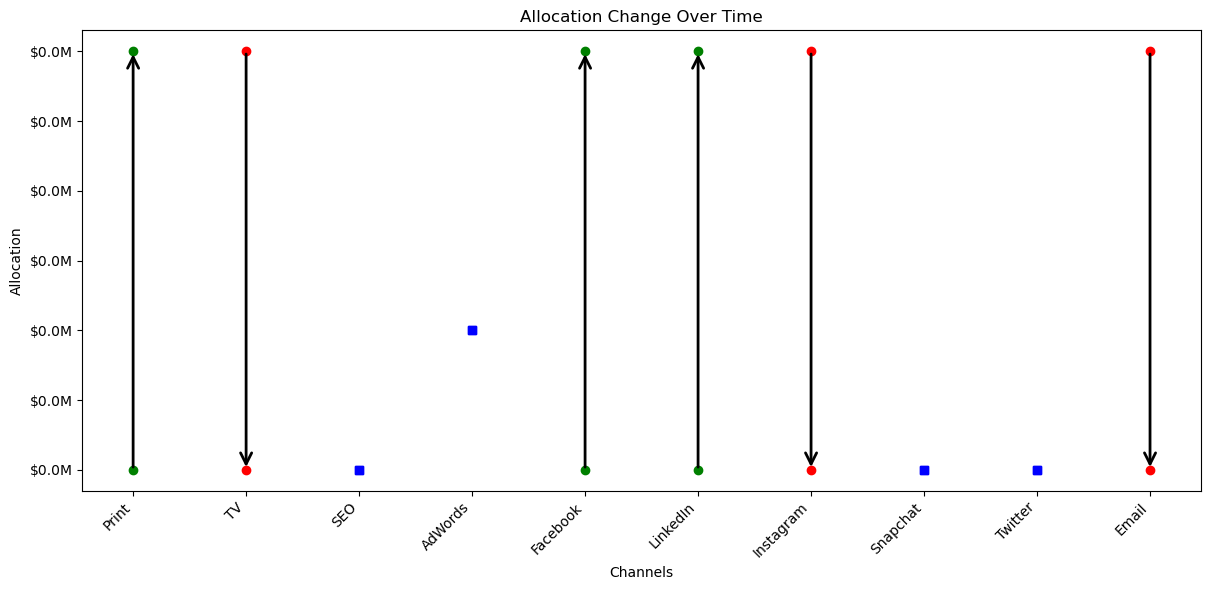

In [11]:
import matplotlib.pyplot as plt

channels = output_2_df['Channel']
model_1 = output_2_df['Allocation in Model 1(in million)']
model_2 = output_2_df['Allocation in Model 2(in million)']
change = output_2_df['Change in allocation:']

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define markers for Model-1 and Model-2
markers = {'Model-1': 'o', 'Model-2': 's'}

# Plot each channel's allocation change over time
for i, row in output_2_df.iterrows():
    channel = row['Channel']
    allocation_change = row['Allocation in Model 2(in million)'] - row['Allocation in Model 1(in million)']
    color = 'g' if allocation_change > 0 else 'r' if allocation_change < 0 else 'b'  # Green for increase, red for decrease, blue for no change
    marker = markers['Model-1'] if allocation_change != 0 else markers['Model-2']  # Use different markers for Model-1 and Model-2
    ax.plot([channel, channel], [row['Allocation in Model 1(in million)'], row['Allocation in Model 2(in million)']], marker, color=color, label=f'{row["Change in allocation:"]}')

# Set labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Allocation')
ax.set_title('Allocation Change Over Time')

# Add arrows for increase and decrease with larger arrow size
for i, row in output_2_df.iterrows():
    allocation_change = row['Allocation in Model 2(in million)'] - row['Allocation in Model 1(in million)']
    if allocation_change != 0:
        ax.annotate('', xy=(row['Channel'], row['Allocation in Model 2(in million)']), xytext=(row['Channel'], row['Allocation in Model 1(in million)']),
                    arrowprops=dict(arrowstyle='->', color='black', lw=2, mutation_scale=20))  # Increase mutation_scale for larger arrows

# Remove the legend
ax.legend().set_visible(False)

# Display the graph
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(visible=False)

# Set Y-axis labels as in the table
ax.set_yticklabels(['${:,.1f}M'.format(y / 1000000) for y in ax.get_yticks()])

plt.show()

<div class="alert alert-block alert-info">
    
<strong>Question statement (Q5) :</strong> 

1. Assuming the first ROI data is correct, if you were to use the second allocation how much lower would the objective be relative to the optimal objective? 

2. Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective? 

3. Do you think the third constraint is useful?

In [12]:
sum_first_roi_second_allocation=0
sum_second_roi_first_allocation=0

for i in range(no_of_channels_roi_data):
    #calcualte the ROI using the second allocation if the first ROI is correct
    sum_first_roi_second_allocation+= object_vec[i]*marketing_model_2_X.x[i]

    #calcualte the ROI using the first allocation if the second ROI is correct
    sum_second_roi_first_allocation+= object_vec_2[i]*marketing_model_X.x[i]

In [13]:
print("If we use the second allocation with the first ROI, we get",sum_first_roi_second_allocation)
print("If we use the first allocation with the second ROI, we get",sum_second_roi_first_allocation)

If we use the second allocation with the first ROI, we get 0.252
If we use the first allocation with the second ROI, we get 0.264


In [14]:
#initializing the model in Gurobi
marketing_model_4=gp.Model()

#Creating the decision variables for the model. '
# The third constraint of all the decision variables being under 3 million has been removed here
marketing_model_4_X = marketing_model_4.addMVar(no_of_channels_roi_data)

#Adding the objective function for the model
marketing_model_4.setObjective(gp.quicksum(object_vec[i]*marketing_model_4_X[i] for i in range(no_of_channels_roi_data)),sense=gp.GRB.MAXIMIZE)

#Adding the constraints for the model
marketing_4_cons=[0]*3

marketing_4_cons[0] = marketing_model_4.addConstr(marketing_model_4_X[facebook_index] + marketing_model_4_X[email_index] >=  marketing_model_4_X[print_index] + marketing_model_4_X[tv_index])
marketing_4_cons[1] = marketing_model_4.addConstr(marketing_model_4_X[facebook_index] + marketing_model_4_X[linkedin_index] + marketing_model_4_X[instagram_index] + marketing_model_4_X[snapchat_index] + marketing_model_4_X[twitter_index] >= 2*marketing_model_4_X[seo_index] + 2*marketing_model_4_X[adwords_index])
marketing_4_cons[2] = marketing_model_4.addConstr(gp.quicksum(marketing_model_4_X[i] for i in range(no_of_channels_roi_data))<=10)
marketing_model_4.Params.OutputFlag = 0 # tell gurobi to shut up!!
marketing_model_4.optimize() #Solving the model

print("Optimzation Status is :",marketing_model_4.Status)

#print the optimal objective value
print("The Optimal ROI is: ",marketing_model_4.objVal,"million")


Optimzation Status is : 2
The Optimal ROI is:  0.46499999999999997 million


If we used the second allocation instead of the first allocation when the first ROI data is correct, we would then get ***0.252 millioninstead of 0.456 million*** 


Again, if we used the first allocation instead of the second allocation when the second ROI data is correct, we would then get ***0.264 million instead of 0.456 million***


Moreover, we see that if the third constraint is removed, the total ROI is 0.465 million. This is more that the optimal ROI obtained if the constraint had been placed. ***Thus, the third constraint is not useful***

<div class="alert alert-block alert-info">

<strong>Question statement (Q6):</strong> To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [15]:
for i in marketing_model.getVars():
    print(f"{i.varName}: Lower Bound is {i.SAObjLow} and Upper Bound is {i.SAObjUp}")

C0: Lower Bound is -inf and Upper Bound is 0.049
C1: Lower Bound is 0.039 and Upper Bound is 0.062
C2: Lower Bound is -inf and Upper Bound is 0.039
C3: Lower Bound is 0.033 and Upper Bound is 0.046
C4: Lower Bound is -inf and Upper Bound is 0.028999999999999998
C5: Lower Bound is -inf and Upper Bound is 0.039
C6: Lower Bound is 0.039 and Upper Bound is inf
C7: Lower Bound is -inf and Upper Bound is 0.039
C8: Lower Bound is -inf and Upper Bound is 0.039
C9: Lower Bound is 0.028999999999999998 and Upper Bound is inf


<div class="alert alert-block alert-info">

<strong>Question statement (Q7):</strong> Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = $10.2M. The monthly ROI for next year is given in an attached csv file. The three constraints given by your boss are still in place for each month. What is the optimal allocation for each month?

***
Reading the ROI_mat.csv file here
***

In [16]:
roi_month = pd.read_csv('ROI_mat.csv')
roi_month.head()

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9


In [17]:
no_of_channels_roi_month= len(roi_month.columns) -1
no_of_rows_roi_month= len(roi_month)

In [18]:
tv_index = get_col_index("TV",roi_month)
print_index = get_col_index("Print",roi_month)
facebook_index = get_col_index("Facebook",roi_month)
email_index = get_col_index("Email",roi_month)
linkedin_index = get_col_index("Linkedin",roi_month)
instagram_index = get_col_index("Instagram",roi_month)
snapchat_index = get_col_index("Snapchat",roi_month)
twitter_index = get_col_index("Twitter",roi_month)
seo_index = get_col_index("SEO",roi_month)
adwords_index = get_col_index("Adwords",roi_month)

roi_month_channel_list= roi_month.iloc[:, 1:].columns

In [19]:
object_vec_3 = 0.01* roi_month.iloc[:, 1:].values

In [20]:
#initializing the model in Gurobi
marketing_model_3=gp.Model()

#Creating the decision variables for the model. '
# All the variables cannot be more than 3 million
marketing_model_3_X = marketing_model_3.addMVar((no_of_rows_roi_month,no_of_channels_roi_month), ub=3)

#Adding the objective function for the model
marketing_model_3.setObjective(gp.quicksum(object_vec_3[i,j]*marketing_model_3_X[i,j] for i in range(no_of_rows_roi_month) for j in range(10)),sense=gp.GRB.MAXIMIZE)

#Adding the constraints for the model
vcons_1 = marketing_model_3.addConstrs((marketing_model_3_X[i,facebook_index] + marketing_model_3_X[i,email_index] >=  marketing_model_3_X[i,print_index] + marketing_model_3_X[i,tv_index]) for i in range(no_of_rows_roi_month))
vcons_2 = marketing_model_3.addConstrs((marketing_model_3_X[i,facebook_index] + marketing_model_3_X[i,linkedin_index] + marketing_model_3_X[i,instagram_index] + marketing_model_3_X[snapchat_index] + marketing_model_3_X[i,twitter_index] >= 2*marketing_model_3_X[i,seo_index] + 2*marketing_model_3_X[i,adwords_index]) for i in range(no_of_rows_roi_month))
vcons_3 = marketing_model_3.addConstr(gp.quicksum(marketing_model_3_X[0,j] for j in range(no_of_channels_roi_month))<=10)
vcons_4 = marketing_model_3.addConstrs((gp.quicksum(marketing_model_3_X[i,j] for j in range(no_of_channels_roi_month))<=10 + 0.5*gp.quicksum(object_vec_3[i-1,j]*marketing_model_3_X[i-1,j] for j in range(no_of_channels_roi_month))) for i in range(1,no_of_rows_roi_month,1))

marketing_model_3.Params.OutputFlag = 0 # tell gurobi to shut up!!
marketing_model_3.optimize() #Solving the model

print("Optimzation Status is :",marketing_model_3.Status)

#print the optimal objective value
print("The Optimal ROI is: ",marketing_model_3.objVal,"million")

Optimzation Status is : 2
The Optimal ROI is:  4.93649202688476 million


In [21]:
month_df = pd.DataFrame({'Channel': roi_month_channel_list})
month_names=[]

for i in range(no_of_rows_roi_month):
    month_name = str(roi_month.iloc[i, 0])
    month_names.append(month_name)

    allocation = marketing_model_3.x[10*i:10*i+10]  # Appending each column in the month_df

    # Append the allocation values to the month_df DataFrame
    month_df[month_name] = allocation

# Print the DataFrame with allocation values for each month
new_month_df=month_df.set_index('Channel').T

print("The optimal allocations for each month are as follows:")
new_month_df

The optimal allocations for each month are as follows:


Channel,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000
February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000
March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.203148,0.0,3.000000,0.000000
April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.203758,0.000000
May,1.200168,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000
June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.205503,3.000000
July,0.605952,0.000000,0.0,3.000000,0.605952,0.0,3.000000,0.0,3.000000,0.000000
August,2.714132,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000
September,0.609498,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.609498
October,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,0.000000,1.201356


<div class="alert alert-block alert-info">

<strong>Question statement (Q8):</strong> A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?

In [22]:
monthly_change = new_month_df.diff().abs()

# Find where the. onthy difference exceeds $1M
more_than_1M_df = (monthly_change > 1).astype(int)
more_than_1M_df

Channel,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,0,0,0,0,0,0,0,0,0,0
February,0,0,0,1,1,0,1,0,1,1
March,1,0,0,0,1,1,1,0,1,0
April,0,0,0,0,0,0,1,0,1,0
May,1,0,0,1,0,1,0,0,1,1
June,1,0,0,0,0,0,0,0,1,0
July,1,0,0,1,0,0,0,0,1,1
August,1,0,0,1,0,0,1,0,0,1
September,1,0,0,1,0,1,0,0,0,1
October,0,0,0,0,0,0,1,0,1,0


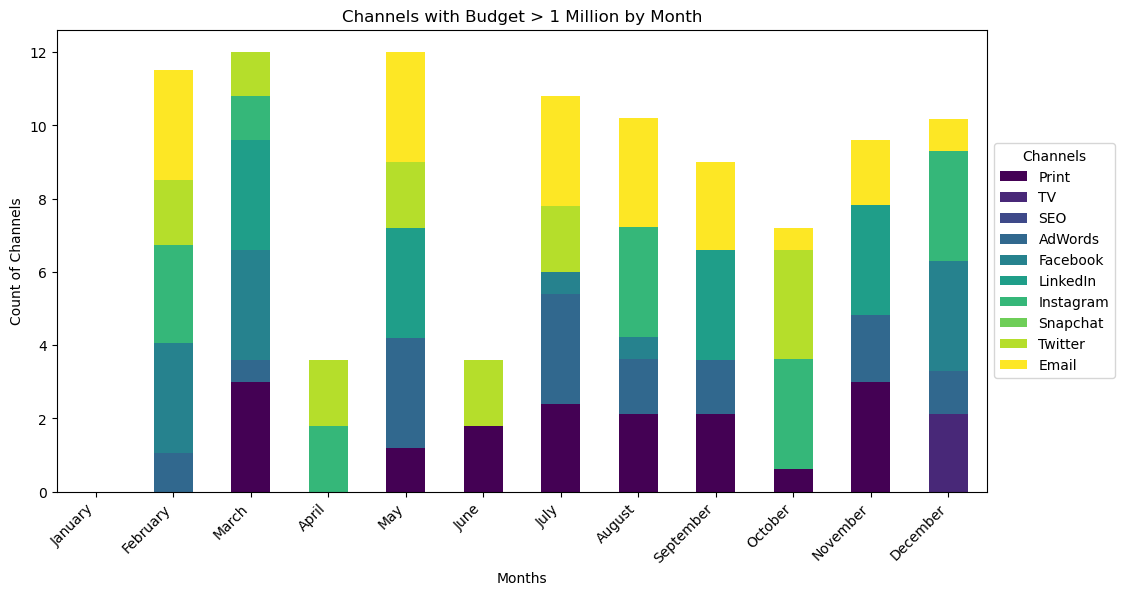

In [23]:
# Creating a stacked column chart

monthly_change_reset = monthly_change.reset_index()

ax = monthly_change_reset.plot(x='index', kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Channels with Budget > 1 Million by Month')
plt.xlabel('Months')
plt.ylabel('Count of Channels')
plt.legend(title='Channels', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xticks(rotation=45, ha='right')
plt.show()

We see that there are cases, where the monthly change is more than one million dollars. Thus, ***the allocation is not stable.***

To make sure that our optimal allocation is stable we need to add 110 more constraints. This can be added using the AddConstrs function. The generic structure for this constraint will be

addConstrs((gp.quicksum(abs(marketing_model_3_X[i,j] - marketing_model_3_X[i-1,j]) <= 1 for j in range(10) for i in range(1,12,1))